In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1494.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1350.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1453.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1110.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1351.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1407.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1394.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1016.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1428.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1366.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1308.jpg
/kaggle/input/cats-and-dogs-small/cats_and_dogs_small/validation/dogs/dog.1247.jpg
/kag

In [2]:
import shutil, pathlib

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) #150 #148
model.add(layers.MaxPooling2D((2, 2))) #74
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #72
model.add(layers.MaxPooling2D((2, 2))) #36
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #34
model.add(layers.MaxPooling2D((2, 2))) #17
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #15
model.add(layers.MaxPooling2D((2, 2))) #7
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-08-16 14:57:44.265760: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [7]:
#資料預處理
'''
1.讀取影像檔案
2.將JPEG內容解碼為RGB像素
3.將RGB像素轉換為浮點數張量
4.將像素值(0~255)壓縮到[0,1]區間 (神經網路更適合處理小輸入值)
'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
new_base_dir = "../input/cats-and-dogs-small/cats_and_dogs_small"

#設定訓練、測試資料的python產生器，並將像素值(0~255)壓縮到[0,1]區間
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_base_dir + "/train", #目標目錄
    target_size=(150, 150), #調整所有影像大小為150*150
    batch_size=20,
    class_mode='binary') #因為使用binary_crossentropy作為損失值，所以需二元標籤

validation_generator = test_datagen.flow_from_directory(
    new_base_dir + "/validation",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [10]:
history = model.fit_generator(train_generator, #設定產生量
                             steps_per_epoch=100, #設定從產生器抽取100個批次量，100*20=2000
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50) #50*20=1000

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-08-16 14:57:45.383233: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
100/100 [==============================] - 52s 503ms/step - loss: 0.6895 - acc: 0.5435 - val_loss: 0.6719 - val_acc: 0.5690
Epoch 2/30
100/100 [==============================] - 45s 453ms/step - loss: 0.6585 - acc: 0.5970 - val_loss: 0.6524 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 46s 461ms/step - loss: 0.6124 - acc: 0.6755 - val_loss: 0.6054 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 46s 456ms/step - loss: 0.5672 - acc: 0.7045 - val_loss: 0.5808 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 47s 471ms/step - loss: 0.5280 - acc: 0.7345 - val_loss: 0.5738 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 50s 494ms/step - loss: 0.5071 - acc: 0.7430 - val_loss: 0.5896 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 50s 502ms/step - loss: 0.4833 - acc: 0.7670 - val_loss: 0.6405 - val_acc: 0.6520
Epoch 8/30
100/100 [==============================] - 4

In [11]:
model.save('cats_and_dogs_small.h5')

In [12]:
import matplotlib.pyplot as plt

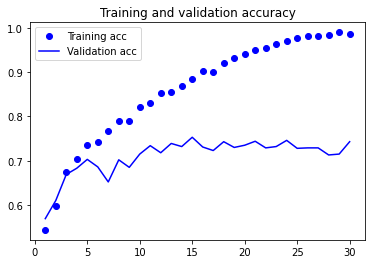

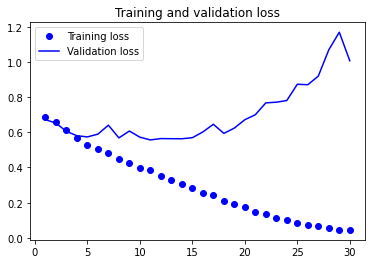

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
#資料擴增(data augmentation)
datagen = ImageDataGenerator(rotation_range=40, #旋轉的角度值: 0~180
                            width_shift_range=0.2, #水平平移: 數字為總寬度的百分比
                            height_shift_range=0.2, #垂直平移: 數字為總高度的百分比
                            shear_range=0.2, #傾斜影像: 順時鐘傾斜的角度
                            zoom_range=0.2, #縮放影像: 縮放百分比
                            horizontal_flip=True, #水平翻轉一半: 圖像須非左右對稱才有效
                            fill_mode='nearest') #填補新建影像空白之方式: 此為以最接近的像素質填補

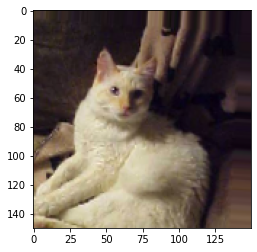

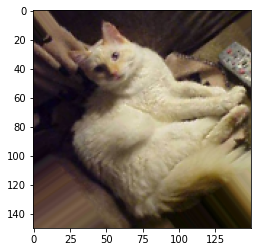

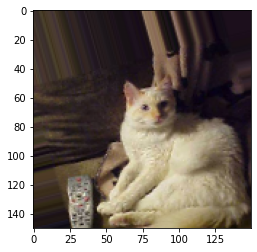

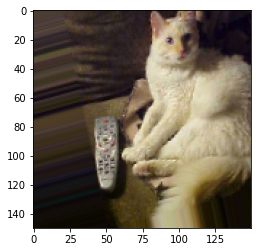

In [15]:
#顯示隨機擴充的訓練影像
from tensorflow.keras.preprocessing import image #影像預先處理工具的模組

train_cats_dir = "../input/cats-and-dogs-small/cats_and_dogs_small/train/cats"
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150)) #讀取影像並調整大小

x = image.img_to_array(img) #轉換成shape=(150,150,3)的numpy矩陣
x = x.reshape((1, ) + x.shape) #調整shape=(1,150,150,3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    plt.show()

In [16]:
#擴增的圖仍與原圖極度相關，因此為了進一步防止overfitting，需在密集連接的分類器前增加Dropout層(在Flatten層後)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #丟棄50%
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
new_base_dir = "../input/cats-and-dogs-small/cats_and_dogs_small"

train_generator = train_datagen.flow_from_directory(
    new_base_dir + "/train",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    new_base_dir + "/validation",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 55s 539ms/step - loss: 0.6945 - acc: 0.5140 - val_loss: 0.6864 - val_acc: 0.5610
Epoch 2/100
100/100 [==============================] - 54s 538ms/step - loss: 0.6835 - acc: 0.5580 - val_loss: 0.6662 - val_acc: 0.5900
Epoch 3/100
100/100 [==============================] - 54s 534ms/step - loss: 0.6724 - acc: 0.5710 - val_loss: 0.6681 - val_acc: 0.5820
Epoch 4/100
100/100 [==============================] - 54s 541ms/step - loss: 0.6648 - acc: 0.6090 - val_loss: 0.6466 - val_acc: 0.6260
Epoch 5/100
100/100 [==============================] - 55s 548ms/step - loss: 0.6497 - acc: 0.6215 - val_loss: 0.7735 - val_acc: 0.5250
Epoch 6/100
100/100 [==============================] - 55s 545ms/step - loss: 0.6334 - acc: 0.6330 - val_loss: 0.6152 - val_acc: 0.6560
Epoch 7/100
100/100 [==============================] - 54s 538ms/step - loss: 0.6190 - acc: 0.6475 - val_loss: 0.5918 - val_acc: 0.6700
Epoch 8/100
100/100 [===========================

In [20]:
model.save('cats_and_dogs_small.h5')

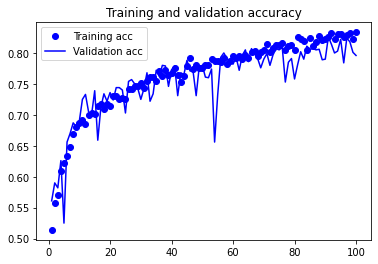

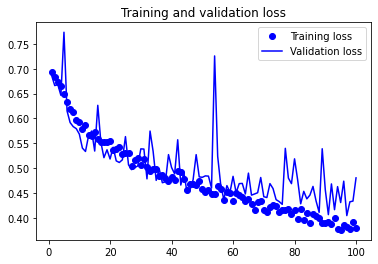

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()